# Principais métodos de Machine Learning

### Métodos supervisionados

Geralmente associados a problemas de regressão e classificação, onde a **variável resposta** (target, label, etc.) está **presente** no conjunto de dados de treinamento.

*   regressão linear
*   regressão logística
*   SVM
*   árvore de decisão
*   KNN
*   gradient boosting
*   redes neurais

🔗 [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html)

**Exemplos de aplicações:**
*   classificar e-mails como spam ou não
*   estimar a idade de uma criança a partir de sua altura
*   estimar o valor de um imóvel com base em suas características (número de quartos, localização, etc.)
*   detectar atividades fraudulentas em transações financeiras

### Métodos não supervisionados

Geralmente associados a problemas de agrupamento (clustering), onde a **variável resposta** (target, label, etc) está **ausente** no conjunto de dados de treinamento.

*   k-Means
*   métodos hierárquicos
*   DBSCAN

🔗 [métodos de agrupamento disponíveis no Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

🔗 [Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)

**Exemplos de aplicações:**
*   segmentação de clientes
*   agrupar produtos com base em padrões de compra para oferecer recomendações
*   agrupar usuários de redes sociais com base em padrões de interação ou interesses comuns
*   detecção de fraudes: identificar ocorrências que se desviam do comportamento típico do conjunto de dados
*   sequenciamento genético: agrupar sequências semelhantes para estudar diversidade ou identificar relações evolutivas



---

© 2024 Augusto Fadel 🔷 augustofadel@gmail.com

## Supervisionados

### Regressão linear

Modela a relação **linear** entre variáveis de entrada (variáveis preditoras) e uma variável de saída contínua (variável resposta).

🛑 [Pressupostos clássicos dos modelos de regressão linear e suas implicações sobre as avaliações em massa.](https://www.researchgate.net/publication/335474295_PRESSUPOSTOS_CLASSICOS_DOS_MODELOS_DE_REGRESSAO_LINEAR_E_SUAS_IMPLICACOES_SOBRE_AS_AVALIACOES_EM_MASSA)

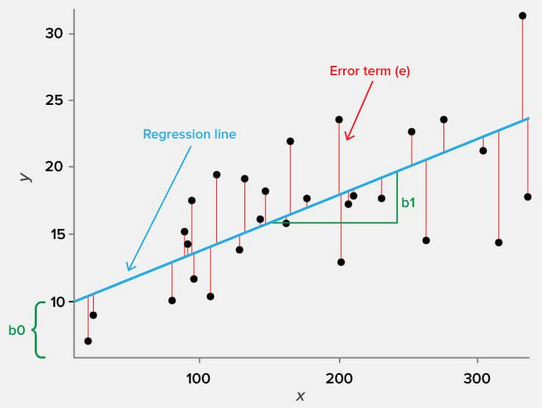

🔗 [Fonte](https://serokell.io/blog/regression-analysis-overview)

In [ ]:
import seaborn as sns
df = sns.load_dataset('anscombe')
sns.lmplot(
    data=df, x='x', y='y', col='dataset', hue='dataset', col_wrap=2,
    palette='muted', ci=None,height=4, scatter_kws={'s': 50, 'alpha': 1},
    fit_reg=False
)

Exemplo: estimar o valor de um imóvel com base em suas características.

🔗 [Fonte](https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/USA_Housing.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.corr(numeric_only=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])

In [ ]:
predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['valor_estimado'] = predicted

resultado

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predicted)

### Regressão logística

Utilizada para problemas de classificação binária, estima a probabilidade de uma instância pertencer a uma classe.

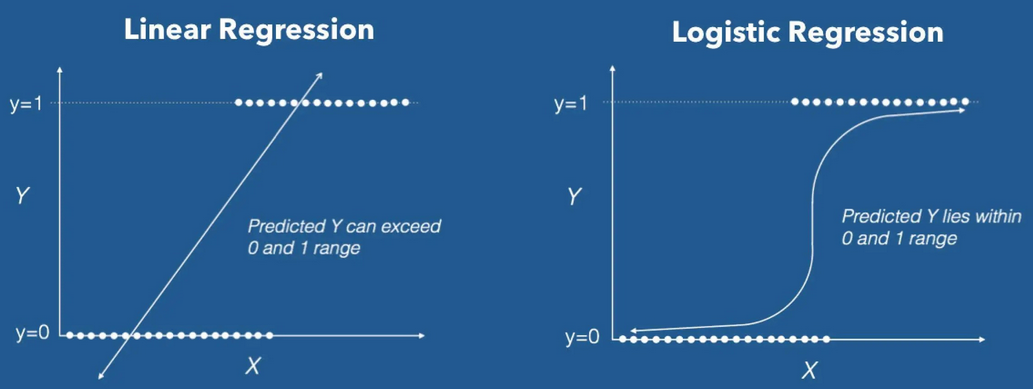

🔗 [Fonte](https://www.machinelearningplus.com/machine-learning/logistic-regression-tutorial-examples-r/)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
df.head()

In [ ]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

In [ ]:
df.groupby('Embarked').count()

In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.dropna(inplace=True)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived', 'Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['reg_log'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['reg_log'].mean())

### SGD

Stochastic Gradient Descent atualiza iterativamente os parâmetros do modelo usando uma amostra aleatória de dados em cada passo.



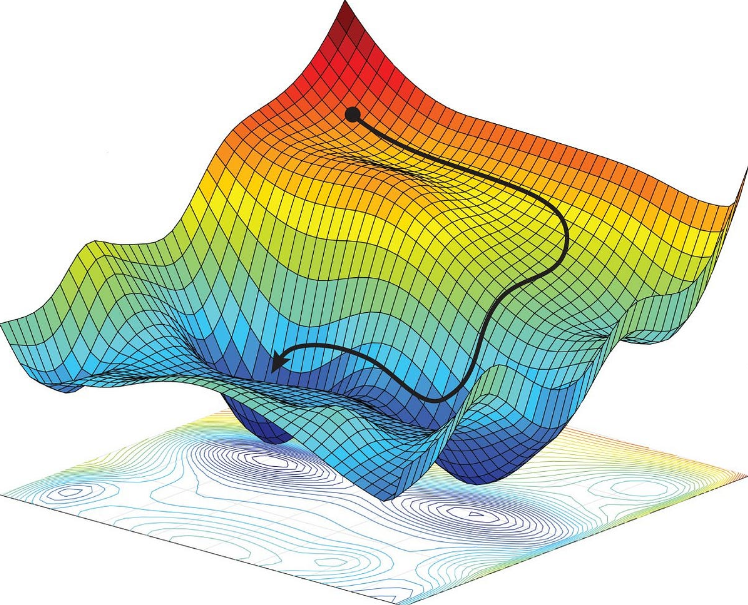

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)
model.fit(X_train,y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['sgd'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['sgd'].mean())

### SVM

Suport Vector Machine encontra um (hiper)plano de decisão que melhor separa instâncias de diferentes classes no espaço de variáveis.

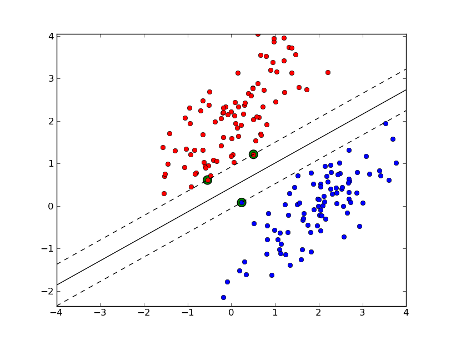

🔗 [Fonte](http://francescopochetti.com/support-vector-machines/)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['svm'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['svm'].mean())

### Árvores de Decisão

Modela decisões em forma de uma árvore, onde cada nó representa uma condição e cada folha uma saída.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['dt'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['dt'].mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['rf'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['rf'].mean())

### KNN

K-Nearest Neighbors atribui uma instância à classe mais comum entre seus k vizinhos mais próximos no espaço de variáveis.

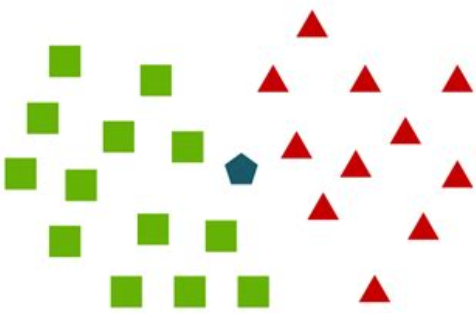

🔗 [Fonte](https://www.researchgate.net/figure/K-Nearest-Neighbor-KNN-classification-principle_fig4_343080916)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(columns='Survived'))

In [ ]:
from sklearn.model_selection import train_test_split
X = scaler.transform(df.drop(columns='Survived'))
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['knn'] = predicted

resultado

In [ ]:
print(resultado['Survived'].mean())
print(resultado['knn'].mean())

## Não supervisionados

### k-Means

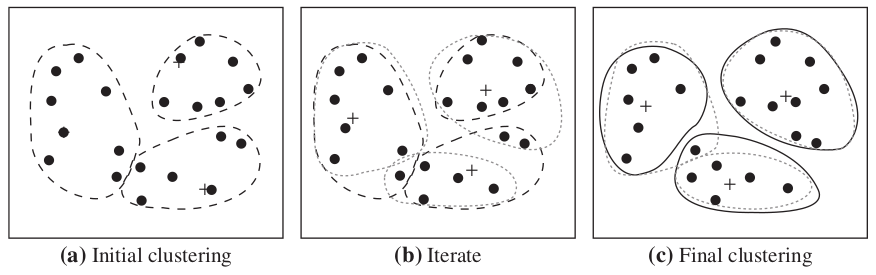

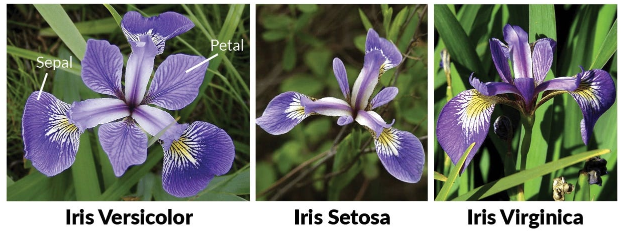

🔗 [Fonte](https://miro.medium.com/v2/resize:fit:2550/0*GVjzZeYrir0R_6-X.png)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_iris(as_frame=True)

scaler = StandardScaler()
iris_pad = scaler.fit_transform(data['data'])

model = KMeans(n_clusters=3, n_init='auto')
model.fit(iris_pad)

resultado = pd.DataFrame(data['target'])
resultado['cluster'] = model.labels_

pd.crosstab(resultado['target'], resultado['cluster'])

### DBSCAN

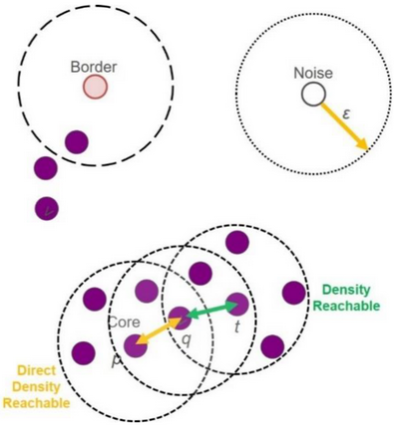

🔗 [Fonte](https://www.mdpi.com/2076-3417/9/20/4398)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = load_iris(as_frame=True)

scaler = StandardScaler()
iris_pad = scaler.fit_transform(data['data'])

model = DBSCAN(eps=0.5, min_samples=5)
model.fit(iris_pad)

resultado = pd.DataFrame(data['target'])
resultado['cluster'] = model.labels_

pd.crosstab(resultado['target'], resultado['cluster'])

### Agrupamento hierárquico

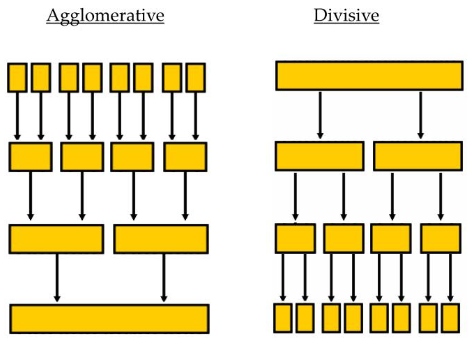

🔗 [Fonte](https://www.slideserve.com/inari/notes-on-cluster-analysis)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

data = load_iris(as_frame=True)

scaler = StandardScaler()
iris_pad = scaler.fit_transform(data['data'])

model = AgglomerativeClustering(n_clusters=3)
model.fit(iris_pad)

resultado = pd.DataFrame(data['target'])
resultado['cluster'] = model.labels_

pd.crosstab(resultado['target'], resultado['cluster'])

## Outros tópicos

*   Redes neurais artificiais (ANN)
*   Redes generativas adversariais (GAN)
*   Processamento de linguagem natural (NLP)
*   Regras de associação
*   Redução de dimensionalidade
*   Mapas Auto-Organizáveis (SOM)
*   Detecção de Anomalias
*   Factorization Machines



# Métricas de avaliação

🔗 [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

### Classificação

*   Accuracy (necessário classes bem balanceadas, cuidado com fenômenos raros)
*   Recall ou sensitivity (capacidade de identificar todos os casos relevantes, minimizar falsos negativos)
*   Precision (proporção de casos que o modelo identificou como relevantes, minimizar falsos positivos)
*   F1-Score ([média harmônica](https://pt.wikipedia.org/wiki/M%C3%A9dia_harm%C3%B4nica) entre precision e recall)

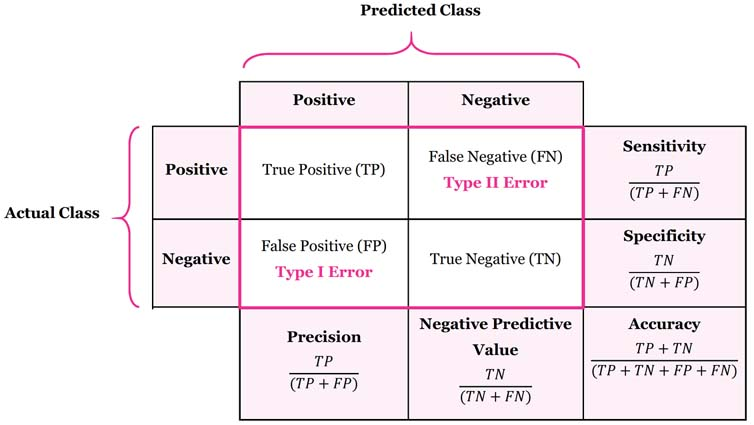

🔗 [Confusion Matrix](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

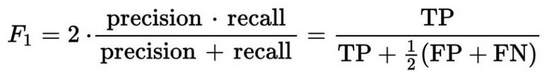

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)
sgd.fit(X_train,y_train)

svm = SVC()
svm.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

In [ ]:
from sklearn.metrics import classification_report

print('regressão logística\n', classification_report(y_test, lr.predict(X_test)))
print('SGD\n', classification_report(y_test, sgd.predict(X_test)))
print('SVM\n', classification_report(y_test, svm.predict(X_test)))
print('árvore de decisão\n', classification_report(y_test, dt.predict(X_test)))
print('random forrest\n', classification_report(y_test, rf.predict(X_test)))
print('KNN\n', classification_report(y_test, knn.predict(X_test)))

### Regressão

*   Mean absolute error - MAE (fácil de interpretar, mas pouco sensível a grandes erros)
*   Mean squared error - MSE (menos interpretável, porém mais sensível a grandes erros)
*   Root mean squared error - RMSE (fácil de interpretar e sensível a grandes erros)
*   Coeficiente de determinação - R2

In [ ]:
import seaborn as sns

df = sns.load_dataset('anscombe')
sns.lmplot(
    data=df, x='x', y='y', col='dataset', hue='dataset', col_wrap=2,
    palette='muted', ci=None,height=4, scatter_kws={'s': 50, 'alpha': 1},
    fit_reg=False
)

In [ ]:
import numpy as np
import sklearn.metrics as sm

X = df[df['dataset'] == 'I']['x'].values[:,np.newaxis]
y = df[df['dataset'] == 'I']['y']
model = LinearRegression()
model.fit(X, y)

predicted = model.predict(X)

plt.scatter(X, y, color='g')
plt.plot(X, predicted, color='k')

print('Mean absolute error =', round(sm.mean_absolute_error(y, predicted), 3))
print('Mean squared error =', round(sm.mean_squared_error(y, predicted), 3))
# print('Root mean squared error =', round(sm.root_mean_squared_error(y, predicted), 3))
print('R2 score =', round(sm.r2_score(y, predicted), 5))

In [ ]:
X = df[df['dataset'] == 'II']['x'].values[:,np.newaxis]
y = df[df['dataset'] == 'II']['y']
model = LinearRegression()
model.fit(X, y)

predicted = model.predict(X)

plt.scatter(X, y, color='g')
plt.plot(X, predicted, color='k')

print('Mean absolute error =', round(sm.mean_absolute_error(y, predicted), 3))
print('Mean squared error =', round(sm.mean_squared_error(y, predicted), 3))
# print('Root mean squared error =', round(sm.root_mean_squared_error(y, predicted), 3))
print('R2 score =', round(sm.r2_score(y, predicted), 5))

In [ ]:
X = df[df['dataset'] == 'III']['x'].values[:,np.newaxis]
y = df[df['dataset'] == 'III']['y']
model = LinearRegression()
model.fit(X, y)

predicted = model.predict(X)

plt.scatter(X, y, color='g')
plt.plot(X, predicted, color='k')

print('Mean absolute error =', round(sm.mean_absolute_error(y, predicted), 3))
print('Mean squared error =', round(sm.mean_squared_error(y, predicted), 3))
# print('Root mean squared error =', round(sm.root_mean_squared_error(y, predicted), 3))
print('R2 score =', round(sm.r2_score(y, predicted), 5))

In [ ]:
X = df[df['dataset'] == 'IV']['x'].values[:,np.newaxis]
y = df[df['dataset'] == 'IV']['y']
model = LinearRegression()
model.fit(X, y)

predicted = model.predict(X)

plt.scatter(X, y, color='g')
plt.plot(X, predicted, color='k')

print('Mean absolute error =', round(sm.mean_absolute_error(y, predicted), 3))
print('Mean squared error =', round(sm.mean_squared_error(y, predicted), 3))
# print('Root mean squared error =', round(sm.root_mean_squared_error(y, predicted), 3))
print('R2 score =', round(sm.r2_score(y, predicted), 5))

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/USA_Housing.csv')

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(X_train, y_train)
model2.fit(X_train.drop(columns='Avg. Area Number of Bedrooms') , y_train)

predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test.drop(columns='Avg. Area Number of Bedrooms'))

resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['valor_estimado1'] = predicted1
resultado['valor_estimado2'] = predicted2

resultado

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean absolute error model 1 =', round(mean_absolute_error(y_test, predicted1), 3))
print('Mean squared error model 1 =', round(mean_squared_error(y_test, predicted1), 3))
# print('Root mean squared error model 1 =', round(root_mean_squared_error(y_test, predicted1), 3))
print('R2 score model 1 =', round(r2_score(y_test, predicted1), 5))

print('Mean absolute error model 2 =', round(mean_absolute_error(y_test, predicted2), 3))
print('Mean squared error model 2 =', round(mean_squared_error(y_test, predicted2), 3))
# print('Root mean squared error model 2 =', round(root_mean_squared_error(y_test, predicted2), 3))
print('R2 score model 2 =', round(r2_score(y_test, predicted2), 5))


### Agrupamento

*   Indíce silhueta
*   Indíce de Rand
*   Informação Mútua Normalizada (Normalized Mutual Information - NMI)



In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

df = load_iris(as_frame=True)

scaler = StandardScaler()
iris_pad = scaler.fit_transform(df['data'])

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris_pad)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(iris_pad)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(iris_pad)

resultado = pd.DataFrame(data['target'])
resultado['kmeans'] = kmeans.labels_
resultado['dbscan'] = dbscan.labels_
resultado['agg'] = agg.labels_

resultado

In [ ]:
print(pd.crosstab(resultado['target'], resultado['kmeans']), '\n')
print(pd.crosstab(resultado['target'], resultado['dbscan']), '\n')
print(pd.crosstab(resultado['target'], resultado['agg']), '\n')

In [ ]:
from sklearn.metrics import silhouette_score, rand_score, normalized_mutual_info_score

print('\nk-Means',
  '\nsilhueta', silhouette_score(iris_pad, kmeans.fit_predict(iris_pad)),
  '\nrand', rand_score(df['target'], kmeans.fit_predict(iris_pad)),
  '\nNMI', normalized_mutual_info_score(df['target'], kmeans.fit_predict(iris_pad))
)
print('\nDBSCAN',
  '\nsilhueta', silhouette_score(iris_pad, dbscan.fit_predict(iris_pad)),
  '\nrand', rand_score(df['target'], dbscan.fit_predict(iris_pad)),
  '\nNMI', normalized_mutual_info_score(df['target'], dbscan.fit_predict(iris_pad))
)
print('\nHierárquico',
  '\nsilhueta', silhouette_score(iris_pad, agg.fit_predict(iris_pad)),
  '\nrand', rand_score(df['target'], agg.fit_predict(iris_pad)),
  '\nNMI', normalized_mutual_info_score(df['target'], agg.fit_predict(iris_pad))
)

# Calibração dos hiperparâmetros

Hiperparâmetros são configurações externas ao modelo que afetam seu comportamento, mas que não são aprendidos diretamente a partir dos dados durante o treinamento.

O ajuste ou calibração dos hiperparâmetros de um modelo visa otimizar seu desempenho.

🛑 Cuidado com overfitting!

Dividir o conjunto de dados em treino/validação/teste é uma maneira de identificar overfitting. O processo de [validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada), embora custoso, é recomendado.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/augustofadel/python/master/datasets/titanic_train.csv')
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(columns=['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

Divisão treino/validação/teste

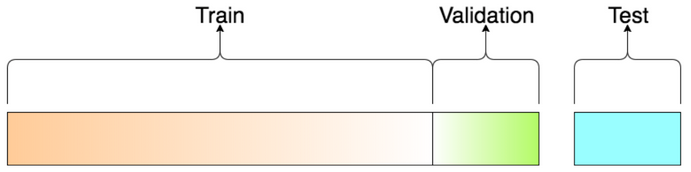

Validação cruzada (k-fold cross validation)

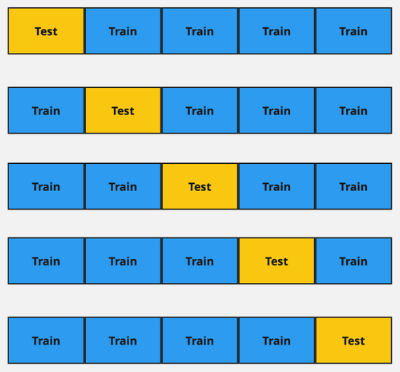

🔗 [Fonte](https://dataaspirant.com/10-k-fold-cross-validation/)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

parametros = {
    'n_estimators': range(100, 600, 100),
    'criterion': ('gini', 'entropy'),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 6)
}
rf = RandomForestClassifier()
model2 = GridSearchCV(
    estimator=rf,
    param_grid=parametros,
    cv=5,
    scoring='accuracy',
    verbose=2
)
model2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test)

print(classification_report(y_test, predicted1))
print(classification_report(y_test, predicted2))

In [ ]:
model2.best_estimator_

# Exercício

Escolha um problema e aplique uma (ou mais) das abordagens apresentadas.

Lembre-se de percorrer as etapas comentadas em aulas anteriores.


🔗 [UCI Machine Learning Repository](https://archive.ics.uci.edu/)

🔗 [Kaggle Datasets](https://www.kaggle.com/datasets)

🔗 [OpenML Datasets](https://www.openml.org/search?type=data&sort=runs&status=active)

### Importação dos dados e pré-processamento

*   Análise exploratóra (EDA)
*   Seleção de variáveis (feature selection)
*   Construção de vaiáveis (feature engineering)

### Conjuntos de treinamento/validação/teste

*   Treinamento: treinar o modelo
*   Validação: ajuste dos hiperparâmetros
*   Teste: avaliar performance **final** do modelo

💡 [Validação Cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada) ▶ [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

### Modelagem


*   Seleção de variáveis (feature selection)
*   Construção de vaiáveis (feature engineering)
*   Especificação e treinamento do modelo
*   Ajuste dos hiperparâmetros (tunning)
*   Avaliação do modelo (performance metrics)


### Predição